## Maschinelles Lernen SS 2021

### Praktikum 2

Einfache Segmentierung von Bildern


In [1]:
import numpy as np

In [2]:
import cv2 as cv
import glob

In [3]:
import os

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Set path to protein images - Please change the path to the location of images on your system
path = "images/"

In [6]:
# Get all image names
imageNames = []
# Format is ['20_B5_1_green.jpg', ...]
[imageNames.append(filename) for filename in glob.glob(path+"*.jpg")]

[None, None, None, None, None, None, None, None, None, None, None, None]

In [7]:
if(os.path.exists(path)):
    # Create subfolders for images of type A and of type B
    os.mkdir(path+'saved_images/')
    os.mkdir(path+'saved_images/A')
    os.mkdir(path+'saved_images/B')

FileExistsError: [WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: 'images/saved_images/'

In [8]:
#For a single image
imageName=imageNames[0]

In [9]:
def readImage(imageName):
    return cv.imread(imageName);

In [10]:
def convertImageToGrayScale(imageProt):
    # Convert to grayscale
    return cv.cvtColor(imageProt, cv.COLOR_BGR2GRAY)

In [11]:
def tresholdImageToBinary(imageProtGray):
     # Treshold image to binary
    tresholdValue = 1.5 * np.mean(imageProtGray)
    ret, grayTresh = cv.threshold(imageProtGray, tresholdValue, 255,
                                  cv.THRESH_BINARY)
    return grayTresh;

In [12]:
def segmentImageIntoProteinContours(greyTreshold):
    ## Segment image
    filterSize = 3
    kernel = np.ones((filterSize,filterSize), np.uint8)
    # Operate closing to fill holes
    grayTreshMorph = greyTreshold
    grayTreshMorph = cv.morphologyEx(greyTreshold,
                                     cv.MORPH_CLOSE, kernel)

    # Get contours
    contours, hierarchy = cv.findContours(grayTreshMorph,
                                         cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # Get largest contours
    proteinContours = []
    # Loop over all contours
    for cnt in contours:
        area = cv.contourArea(cnt)
        # Discard small contours
        if area < 10000:
            continue
        # Add contour
        proteinContours.append(cnt)

    # Display number of protein contours found
    print("Number of protein contours found = " + str(len(proteinContours)))
    return proteinContours;

In [13]:
def getImageProteins(proteinContours, imageProt):
    # Loop over all protein contours to save each protein in 500x500 image
    imageProtProteinContours = imageProt.copy()
    proteinNr = 0
    for c in proteinContours:
        proteinNr += 1
        # Get center of contour
        M = cv.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        # Add black border to image
        padding = 250
        # Crop image for each protein found: 500x500x3 jpg
        imageProtPadded = cv.copyMakeBorder(imageProt, padding, padding,
                                            padding, padding,
                                            cv.BORDER_CONSTANT, value=[0, 0, 0])

        # Crop image
        imgSize = 500
        croppedImg = imageProtPadded[cY-int(imgSize/2)+padding:
                                     cY+int(imgSize/2)+padding,
                                     cX-int(imgSize/2)+padding:
                                     cX+int(imgSize/2)+padding]

        # Save cropped protein images
        if imageName[-14] == 'A':
            print(os.path.basename(imageNameFile))
            pathA= path + 'saved_images/A/' + 'prot' + str(proteinNr) + '' + os.path.basename(imageNameFile)
            print(pathA)
            cv.imwrite(pathA, croppedImg)
        elif imageName[-14] == 'B':
            print(os.path.basename(imageNameFile))
            pathB= path + 'saved_images/B/' +'prot' + str(proteinNr) + '' + os.path.basename(imageNameFile)
            print(pathB)
            cv.imwrite(pathB, croppedImg)
        else:
            print('Could not determine class for image ', imageNameFile)
            continue

Number of protein contours found = 10
20_B5_1_green.jpg
images/saved_images/B/prot120_B5_1_green.jpg
20_B5_1_green.jpg
images/saved_images/B/prot220_B5_1_green.jpg
20_B5_1_green.jpg
images/saved_images/B/prot320_B5_1_green.jpg
20_B5_1_green.jpg
images/saved_images/B/prot420_B5_1_green.jpg
20_B5_1_green.jpg
images/saved_images/B/prot520_B5_1_green.jpg
20_B5_1_green.jpg
images/saved_images/B/prot620_B5_1_green.jpg
20_B5_1_green.jpg
images/saved_images/B/prot720_B5_1_green.jpg
20_B5_1_green.jpg
images/saved_images/B/prot820_B5_1_green.jpg
20_B5_1_green.jpg
images/saved_images/B/prot920_B5_1_green.jpg
20_B5_1_green.jpg
images/saved_images/B/prot1020_B5_1_green.jpg
Number of protein contours found = 12
20_B5_2_green.jpg
images/saved_images/B/prot120_B5_2_green.jpg
20_B5_2_green.jpg
images/saved_images/B/prot220_B5_2_green.jpg
20_B5_2_green.jpg
images/saved_images/B/prot320_B5_2_green.jpg
20_B5_2_green.jpg
images/saved_images/B/prot420_B5_2_green.jpg
20_B5_2_green.jpg
images/saved_images/B/p

506_A4_3_green.jpg
images/saved_images/A/prot15506_A4_3_green.jpg
506_A4_3_green.jpg
images/saved_images/A/prot16506_A4_3_green.jpg
506_A4_3_green.jpg
images/saved_images/A/prot17506_A4_3_green.jpg
506_A4_3_green.jpg
images/saved_images/A/prot18506_A4_3_green.jpg
506_A4_3_green.jpg
images/saved_images/A/prot19506_A4_3_green.jpg
506_A4_3_green.jpg
images/saved_images/A/prot20506_A4_3_green.jpg
506_A4_3_green.jpg
images/saved_images/A/prot21506_A4_3_green.jpg
506_A4_3_green.jpg
images/saved_images/A/prot22506_A4_3_green.jpg
506_A4_3_green.jpg
images/saved_images/A/prot23506_A4_3_green.jpg
Number of protein contours found = 10
555_A4_1_green.jpg
images/saved_images/A/prot1555_A4_1_green.jpg
555_A4_1_green.jpg
images/saved_images/A/prot2555_A4_1_green.jpg
555_A4_1_green.jpg
images/saved_images/A/prot3555_A4_1_green.jpg
555_A4_1_green.jpg
images/saved_images/A/prot4555_A4_1_green.jpg
555_A4_1_green.jpg
images/saved_images/A/prot5555_A4_1_green.jpg
555_A4_1_green.jpg
images/saved_images/A/pr

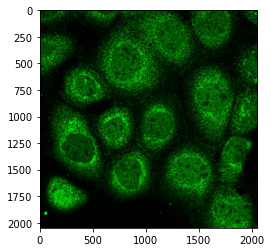

In [14]:
# Loop over all images and segment proteins: please extend
for imageName in imageNames:
    # Read image
    imageProt = cv.imread(imageName);
    cv.destroyAllWindows();
    # Show image
    plt.imshow(imageProt)
    imageNameFile = imageName.split('/')[-1]
    imageProtGray = convertImageToGrayScale(imageProt);
    greyTreshold = tresholdImageToBinary(imageProtGray);
    proteinContours = segmentImageIntoProteinContours(greyTreshold);
    getImageProteins(proteinContours, imageProt);
   